<a href="https://colab.research.google.com/github/adithyakini/algo_intraday/blob/master/MACD_base_buy_and_sell_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Description theis prog uses MACD cross over to indicate buy and sell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load data from csv
from google.colab import files
uploaded = files.upload()

In [4]:
#storte data into df
df = pd.read_csv('DJI.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2018-07-02,2018-07-02,24161.529297,24319.419922,24077.560547,24307.179688,24307.179688,244110000
2018-07-03,2018-07-03,24359.390625,24444.880859,24150.849609,24174.820313,24174.820313,160960000
2018-07-05,2018-07-05,24285.820313,24372.800781,24177.439453,24356.740234,24356.740234,237670000
2018-07-06,2018-07-06,24352.470703,24520.289063,24281.470703,24456.480469,24456.480469,219450000
2018-07-09,2018-07-09,24519.199219,24796.519531,24518.429688,24776.589844,24776.589844,240580000
...,...,...,...,...,...,...,...
2020-07-02,2020-07-02,25936.449219,26204.410156,25778.119141,25827.359375,25827.359375,349130000
2020-07-06,2020-07-06,25996.080078,26297.529297,25996.080078,26287.029297,26287.029297,340690000
2020-07-07,2020-07-07,26172.009766,26174.929688,25866.580078,25890.179688,25890.179688,346820000
2020-07-08,2020-07-08,25950.060547,26109.490234,25816.250000,26067.279297,26067.279297,337300000


<function matplotlib.pyplot.show>

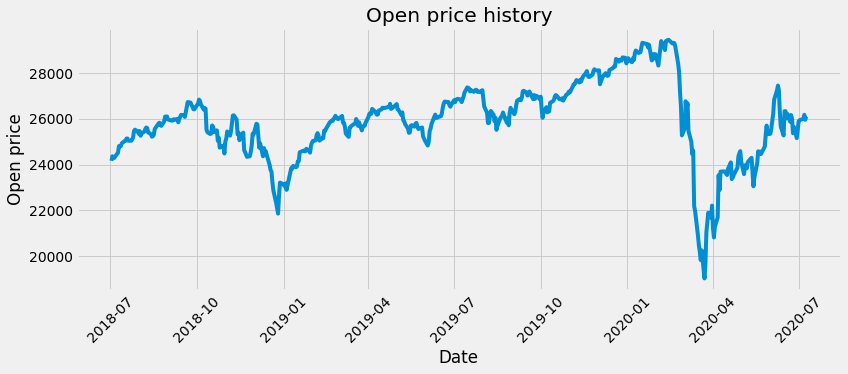

In [5]:
#visually show the stock price
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Open'], label ='open')
plt.title('Open price history')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Open price')
plt.show

In [6]:
#calculate the MACD and signal line indicators
#calculate the short term EMA
shortEMA = df.Open.ewm(span=12, adjust=False).mean()
#calculate longterm EMA
longEMA = df.Open.ewm(span=26, adjust=False).mean()
#clculate MACD line
MACD= shortEMA - longEMA
#signal line
signal=MACD.ewm(span=9, adjust=False).mean()

<function matplotlib.pyplot.show>

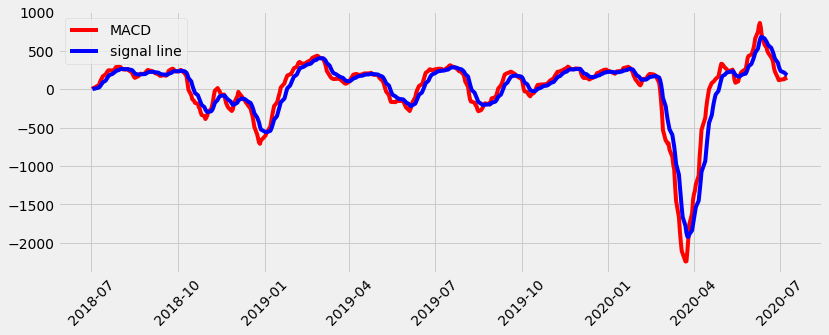

In [7]:
#plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, MACD,label='MACD', color='red')
plt.xticks(rotation=45)
plt.plot(df.index,signal,label='signal line', color='blue')
plt.legend(loc='upper left')
plt.show

In [8]:
#create new columns for the data
df['MACD'] = MACD
df['signal line']= signal

In [10]:
#function for appending the symbol for buy and sell
def buy_sell(signal):
  buy=[]
  sell= []
  flag=-1
  for i in range (0,len(signal)):
    if signal['MACD'][i]>signal['signal line'][i]:
      sell.append(np.nan)
      if flag != 1:
        buy.append(signal['Open'][i])
        flag=1
      else:
          buy.append(np.nan)
    elif signal['MACD'][i] < signal['signal line'][i]:
        buy.append(np.nan)
        if flag != 0:
          sell.append(signal['Open'][i])
          flag=0
        else:
          sell.append(np.nan)
    else:
          buy.append(np.nan)
          sell.append(np.nan)
  return (buy,sell)

In [11]:
#create a buy and sell column
a=buy_sell(df)
df['Buy_Signal_Price']=a[0]
df['Sell_Signal_Price']=a[1]

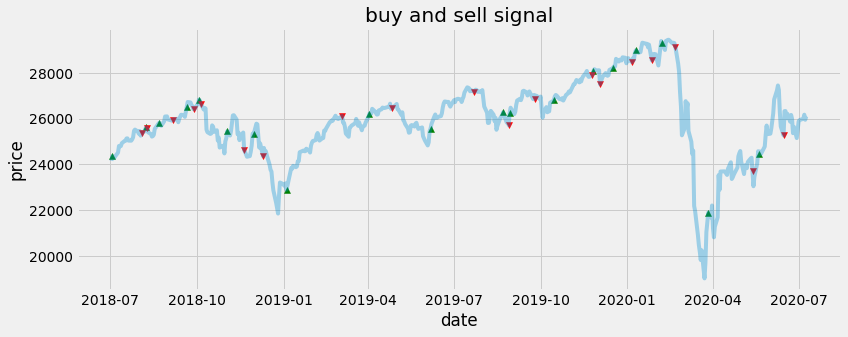

In [12]:
#buy and sell signal
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df['Buy_Signal_Price'], color='green', label='buy',marker='^', alpha=1)
plt.scatter(df.index,df['Sell_Signal_Price'], color='red', label='sell',marker='v', alpha=1)
plt.plot(df['Open'], label='open price', alpha=.35)
plt.title('buy and sell signal')
plt.xlabel('date')
plt.ylabel('price')
plt.show()